In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("shootings.csv")
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


# DESCRIPTIVE STATISTICS

In [3]:
# Identifying the features in the dataset

df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [4]:
# Number of features and observations

df.shape

(4895, 15)

In [5]:
# checking for null values

df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [6]:
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


## Summary of Descriptive Statistics
1. The dataset has no null values
2. Majority of the features are categorical variables
3. The dataset has 15 features(columns) and 4895 observations(rows)


# VISUALIZATIONS

# BAR PLOTS VISUALIZING DEATHS BASED ON RACE AND GENDER

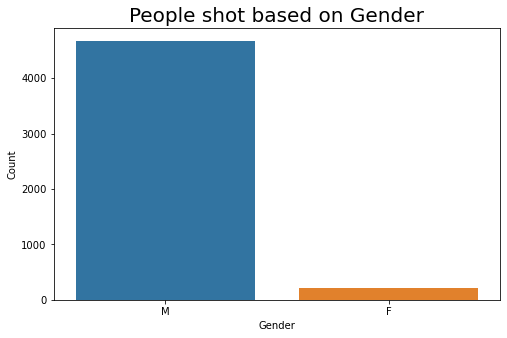

In [14]:
sns.countplot(x = 'gender', data = df)
plt.title('People shot based on Gender', fontsize=20)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### The visualization shows that more males were shot than females

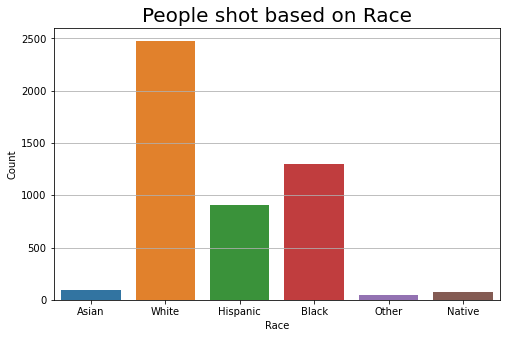

In [21]:
sns.countplot(x= 'race', data = df)
plt.title('People shot based on Race', fontsize = 20)
plt.xlabel("Race")
plt.ylabel("Count")
plt.rcParams['figure.figsize'] = (8, 5)
plt.grid(True, axis = 'y')

### The dataset shows more white people where shot than other races, thereby contradicting the theory that black people get shot at more

# PIE CHARTS VISUALIZING DEATHS BASED ON RACE AND GENDER

Text(0.5, 1.0, 'People shot based on Race')

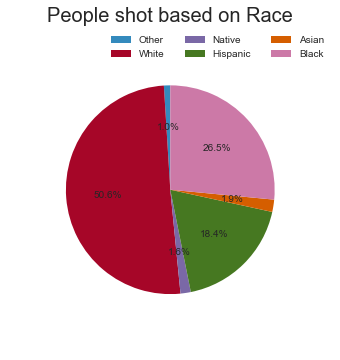

In [31]:
plt.style.use('bmh')
total = df.shape[0]
gb_object = df.groupby('race')
races = gb_object['race'].count().index
death_numbers = gb_object['race'].count().values
order = [4, 5, 3, 2, 0, 1]  # order is changed because autopct values are overlapping.
races = [races[i] for i in order]
death_numbers = [death_numbers[i] for i in order]
plt.figure(figsize = (8, 6), facecolor = 'white')
plt.pie(death_numbers,  autopct = '%1.1f%%', pctdistance=0.6, startangle=90, radius = 0.8)
plt.legend(races, ncol = 3)
plt.title('People shot based on Race', pad = 5, fontsize = 20)

Text(0.5, 1.0, 'People shot based on Gender')

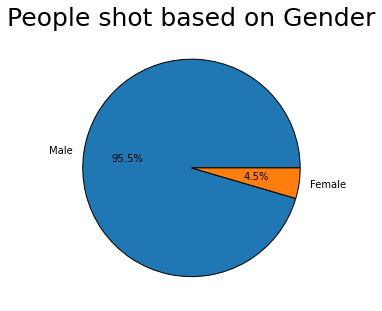

In [23]:
gender = ['Male', 'Female']
people = df['gender'].value_counts().values
plt.figure(figsize = (7, 5))
plt.pie(people, labels = gender, autopct = '%1.1f%%', pctdistance=0.6, wedgeprops={'edgecolor': 'black'})
plt.title('People shot based on Gender', fontsize = 25)

# BAR PLOTS VISUALIZING DEATHS BASED ON AGE AND STATE

Text(0.5, 1.0, 'People Shot Based on Age')

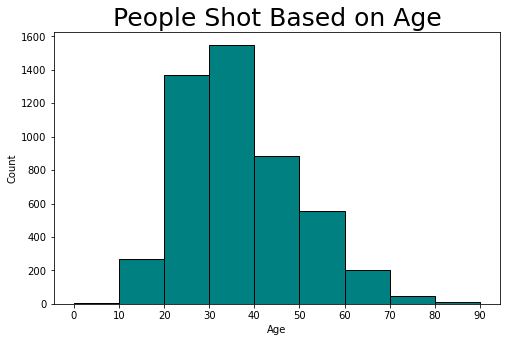

In [27]:
plt.hist(df['age'], bins = range(0, 100, 10), edgecolor = 'black', color = '#008080')
plt.xticks(range(0, 100, 10))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('People Shot Based on Age', fontsize = 25)

### More people get shot at between the age of 20-40

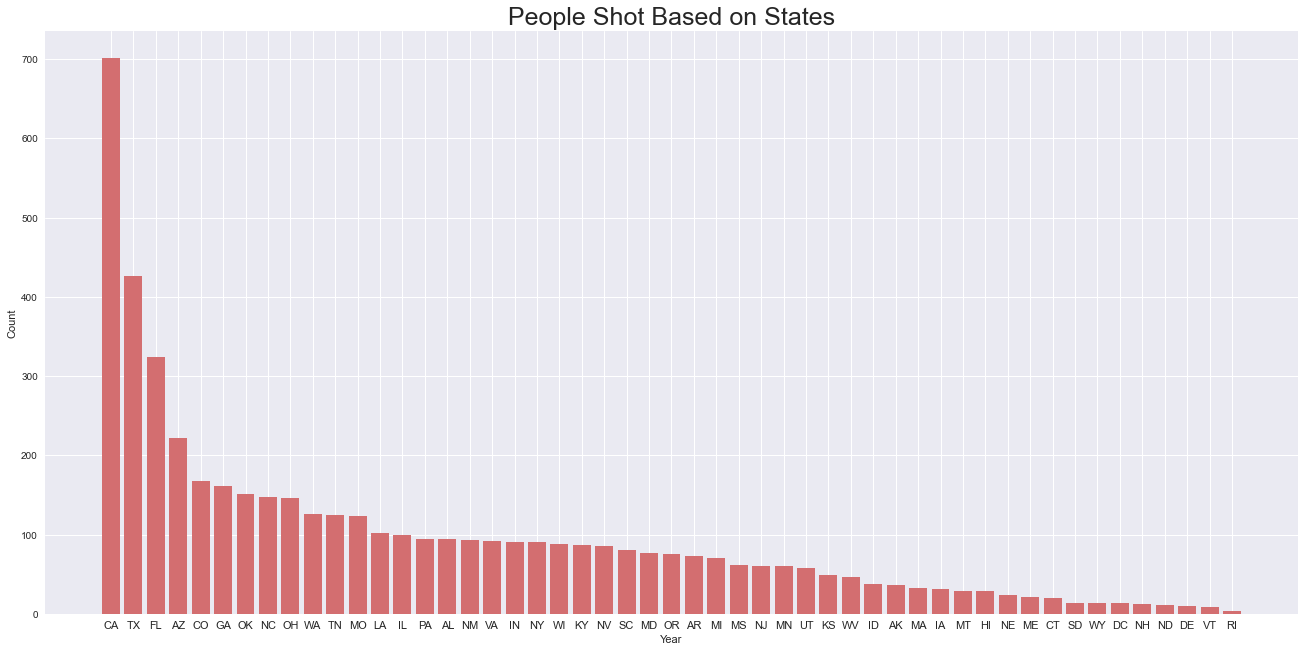

In [47]:

plt.figure(figsize=(20,10))
plt.bar(df['state'].value_counts().index, df['state'].value_counts().values, color = '#d36e70')
plt.title('People Shot Based on States', fontsize = 25)
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(fontsize=11)
plt.show()

### California and Texas have the highest rate of shootings

# PLOTS VISUALIZING DEATHS BASED ON YEAR AND MENTAL ILLNESS

C:\Users\VICTOR JOY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


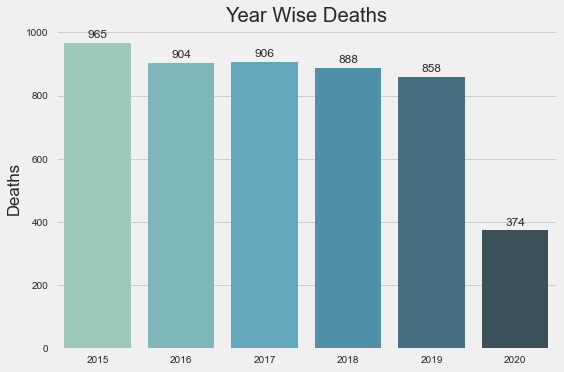

In [43]:
year = pd.to_datetime(df['date']).dt.year.value_counts().sort_index().index
death = pd.to_datetime(df['date']).dt.year.value_counts().sort_index().values
graph2 = sns.barplot(year, death, palette=sns.color_palette("GnBu_d"))
graph2.set_title('Year Wise Deaths')
graph2.set_ylabel('Deaths')
autolabel(graph2)

### This shows a reduction in shootings as the years go by..... Nice!

Text(0.5, 1.0, 'Signs of Mental Illness')

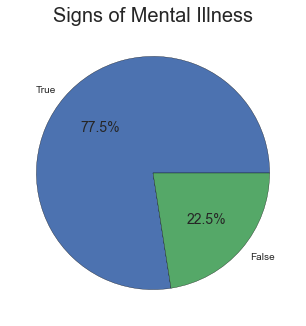

In [45]:
plt.style.use('seaborn')
mental_illness = ['True', 'False']
people = df['signs_of_mental_illness'].value_counts().values
plt.figure(figsize = (7, 5))
plt.pie(people, labels = mental_illness, autopct = '%1.1f%%', pctdistance=0.6, wedgeprops={'edgecolor': 'black'})
plt.title('Signs of Mental Illness',fontsize = 20)


### People with mental illness are more likely to be shot

# PLOTS VISUALIZING DEATHS BASED ON THREAT AND SUSPECTED FLEE

Text(0.5, 1.0, 'Threat')

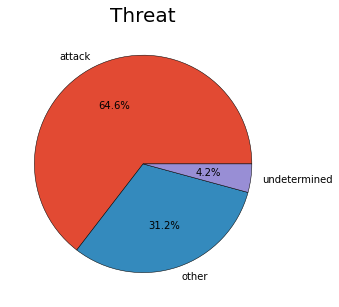

In [9]:
plt.style.use('ggplot')
threat = ['attack', 'other', 'undetermined']
people = df['threat_level'].value_counts().values
plt.figure(figsize = (7, 5))
plt.pie(people, labels = threat, autopct = '%1.1f%%', pctdistance=0.6, wedgeprops={'edgecolor': 'black'})
plt.title('Threat',fontsize = 20)


### People who attack police officers are likely to be shot

<AxesSubplot:title={'center':'Suspect Flee vs Not Flee'}, xlabel='flee', ylabel='count'>

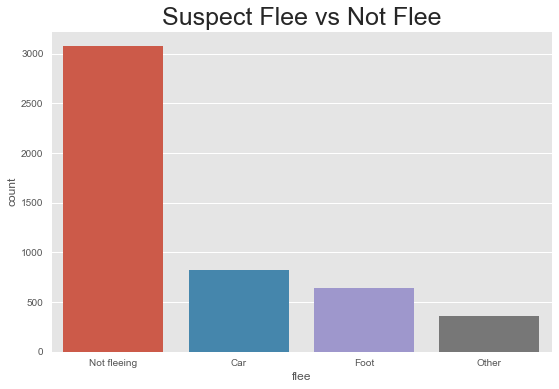

In [49]:
plt.title('Suspect Flee vs Not Flee', fontsize = 25)
sns.countplot(data = df, x = 'flee')

### Police shot more at people not trying to flee. Weird????

# PLOTS VISUALIZING DEATHS BASED ON ARMS AND BODY CAMERA

<AxesSubplot:title={'center':'Presence of Body Camera'}, xlabel='body_camera', ylabel='count'>

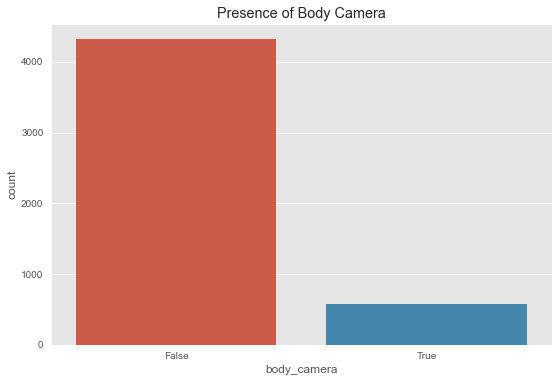

In [50]:
plt.title('Presence of Body Camera')
sns.countplot(data = df, x = 'body_camera')

### Chances of getting shot by a police officer is slim if you have a body camera on

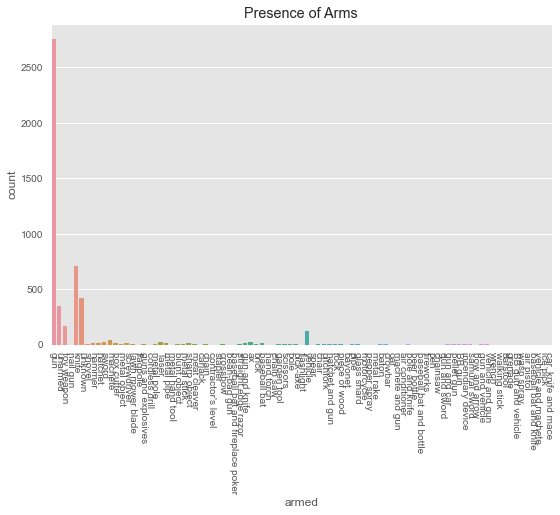

<Figure size 1008x720 with 0 Axes>

In [64]:
plt.title('Presence of Arms')

sns.countplot(data = df, x = 'armed')
plt.xticks(rotation=270)
plt.figure(figsize = (14, 10))

In [ ]:
# The variables are tightly packed together, so I'm going to refactor the code and use the top 5 weapons

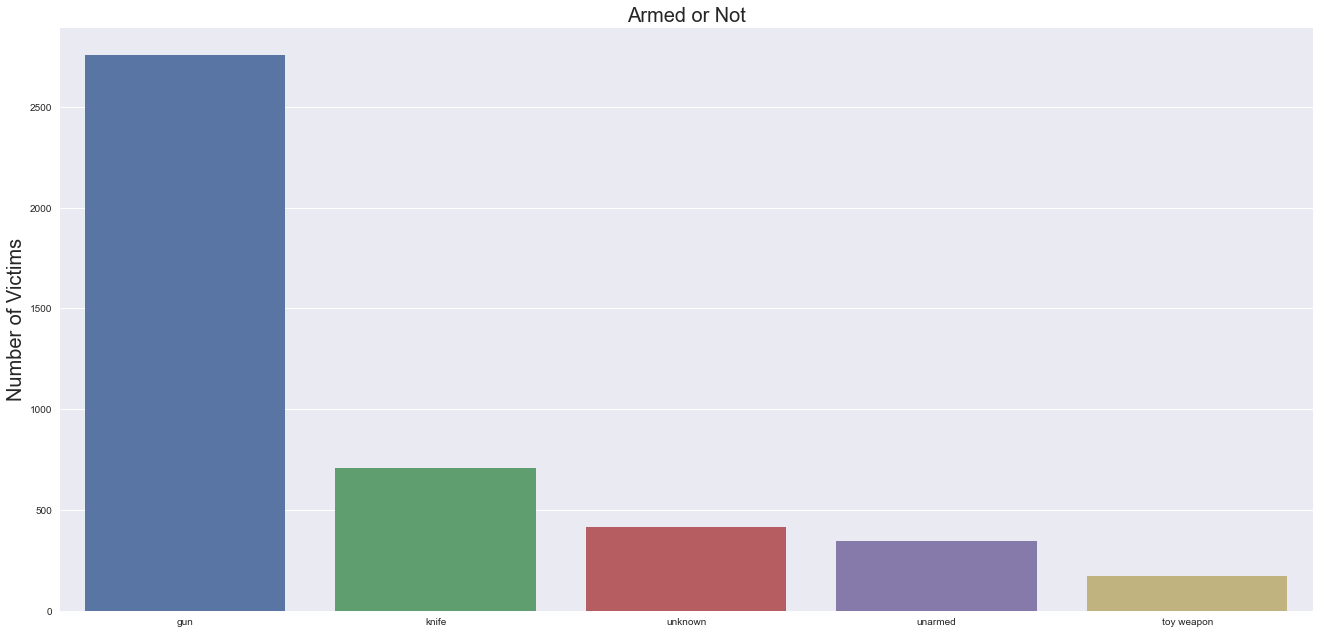

In [71]:
armed_or_not=df.groupby(df['armed']).size()
armed_or_not=armed_or_not.sort_values()
armed_or_not = armed_or_not.to_frame().reset_index()
armed_or_not = armed_or_not.rename(columns={'armed':'Armed', 0:'Count'})
armed_or_not = armed_or_not.sort_values(by = ['Count'],ascending=False)
top_5= armed_or_not.head(5)

plt.figure(figsize=(20,10))
plt.style.use('seaborn')
plt.bar(top_5.Armed,top_5.Count)
sns.barplot(x='Armed', y='Count', data=top_5)
plt.title('Armed or Not', fontsize = 20)
plt.ylabel('Number of Victims', fontsize = 20)
plt.xlabel('', fontsize = 20)
plt.show()

In [ ]:
# guns were used more than any other weapon